# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 451 kB 25.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 20.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 65 kB 4.7 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 49.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 7.4 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [10]:
client = MongoClient(mongod_connect)
db = client.gp8 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [11]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [12]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [13]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [18]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "COVID19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [19]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Tue Nov 30 18:24:07 +0000 2021'
'Tue Nov 30 16:35:37 +0000 2021'
'Tue Nov 30 14:50:08 +0000 2021'
'Tue Nov 30 14:45:16 +0000 2021'
'Tue Nov 30 14:14:25 +0000 2021'
'Tue Nov 30 14:09:53 +0000 2021'
'Tue Nov 30 13:55:45 +0000 2021'
'Tue Nov 30 13:08:56 +0000 2021'
'Tue Nov 30 12:53:58 +0000 2021'
'Tue Nov 30 06:54:15 +0000 2021'
'Tue Nov 30 03:55:00 +0000 2021'
'Tue Nov 30 03:11:22 +0000 2021'
'Tue Nov 30 01:35:49 +0000 2021'
'Mon Nov 29 21:20:38 +0000 2021'
'Mon Nov 29 21:07:49 +0000 2021'
'Mon Nov 29 20:52:30 +0000 2021'
'Mon Nov 29 20:14:48 +0000 2021'
'Mon Nov 29 18:58:12 +0000 2021'
'Mon Nov 29 18:26:09 +0000 2021'
'Mon Nov 29 18:08:55 +0000 2021'
'Mon Nov 29 17:27:07 +0000 2021'
'Mon Nov 29 16:01:22 +0000 2021'
'Mon Nov 29 15:25:42 +0000 2021'
'Mon Nov 29 14:36:01 +0000 2021'
'Mon Nov 29 14:10:04 +0000 2021'
'Mon Nov 29 13:15:01 +0000 2021'
'Mon Nov 29 12:25:24 +0000 2021'
'Mon Nov 29 12:07:35 +0000 2021'
'Mon Nov 29 11:36:55 +0000 2021'
'Mon Nov 29 11:29:48 +0000 2021'
'Mon Nov 2

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [23]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [24]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

379
199


Create a text index and print the Tweets containing specific keywords. 

In [25]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [26]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

Use pprint to display tweets

In [27]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Mary Crain
text: @AGRutledge In 2020 - 182 officer COVID deaths in US. The 2021 Covid deaths so far are 285.  They need a plan to he… https://t.co/SfpXHLY1nD
----
name: Heerak Christian Kim for US Congress (Virginia-8)
text: Will Dr. Fauci's worst nightmare about COVID MUTANT Omicron come true with Omicron evading all COVID vaccines?

Wha… https://t.co/ZVB5jHFtpF
----
name: Ebony Jade Hilton, MD
text: @kisswithah @DrJasonJohnson The laxity by which we describe #COVID from the very beginning has always troubled me.… https://t.co/yXwy1kDRIF
----
name: Nana Ataa
text: ‘Dramatic spike’ in eating disorder hospitalizations occurred during COVID-19 pandemic https://t.co/cr8yR4FZaX
----
name: Heerak Christian Kim for US Congress (Virginia-8)
text: Will @GOP fight @JoeBiden COVID Mandates in 2022 Election Year? https://t.co/OIiJP2whsK
----
name: Sandra L. Combs
text: I had a ticket for today. I’m all boosted up but there will be another time. Praying for those with COVID. ⁦… https://

In [28]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [29]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,61a699987b4313071e6d6486,Wed Nov 24 20:28:03 +0000 2021,1463605354776956932,1463605354776956932,@brentbyan @RedPillDetox That's why we voted b...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.463594e+18,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN
1,61a6999a7b4313071e6d64ca,Mon Nov 22 16:23:09 +0000 2021,1462818949041729539,1462818949041729539,@Maritza98178870 @joncoopertweets @JoeBiden Ne...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.462806e+18,...,False,1,1,False,False,en,NaN,NaN,NaN,NaN
2,61a699997b4313071e6d64a7,Tue Nov 23 17:45:47 +0000 2021,1463202132027396105,1463202132027396105,Ranked Choice Voting Survived Its Biggest Elec...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,20,38,False,False,en,False,NaN,NaN,NaN
3,61a699997b4313071e6d649b,Wed Nov 24 01:40:37 +0000 2021,1463321624221040645,1463321624221040645,Thanksgiving 2021 is the greatest advertisemen...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,2,0,False,False,en,False,NaN,NaN,NaN
4,61a6998d7b4313071e6d6455,Sat Nov 27 15:59:54 +0000 2021,1464625034715144199,1464625034715144199,@TPensions Pensioners hold the key votes in an...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.464352e+18,...,False,1,1,False,False,en,NaN,NaN,NaN,NaN
5,61a6998d7b4313071e6d6450,Sat Nov 27 16:51:56 +0000 2021,1464638128652750848,1464638128652750848,@februaryoracle @yesisworld And that’s exactly...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.464425e+18,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN
6,61a6998d7b4313071e6d6435,Sun Nov 28 19:16:22 +0000 2021,1465036866449723402,1465036866449723402,These awesome #PostcardsToVoters are on their ...,True,"{'hashtags': [{'text': 'PostcardsToVoters', 'i...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,True,2,7,False,False,en,False,1.465022e+18,1465021532799864834,{'created_at': 'Sun Nov 28 18:15:26 +0000 2021...
7,61a6999a7b4313071e6d64c6,Mon Nov 22 22:52:12 +0000 2021,1462916856117927941,1462916856117927941,a #USAH8R:\n\nCa. Congressperson Mike Garcia @...,True,"{'hashtags': [{'text': 'USAH8R', 'indices': [2...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,1,4,False,False,en,False,NaN,NaN,NaN
8,61a699997b4313071e6d6492,Wed Nov 24 12:17:42 +0000 2021,1463481953731190784,1463481953731190784,@RogerHelmerMEP I expect another race bating d...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.463464e+18,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN
9,61a6998c7b4313071e6d6412,Mon Nov 29 23:52:23 +0000 2021,1465468716624355333,1465468716624355333,@RonnyJacksonTX Hey genius. You do get that we...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.464697e+18,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN


<AxesSubplot:>

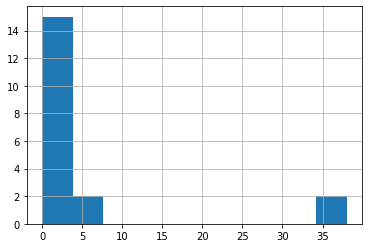

In [30]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count